In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from haversine import haversine, Unit 
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#Setting working directory

os.chdir("D:/Edwisor/Project 1")

print(os.getcwd())

D:\Edwisor\Project 1


In [3]:
#Loading the data

train = pd.read_csv("train_cab.csv")
test = pd.read_csv("test.csv")

# Understanding the Data:

In [4]:
#checking first five rows of the training dataset

train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
#checking first five rows of the test dataset
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
#checking the number of rows and columns in training data
print("shape of train data is: ",train.shape)

#checking the number of rows and columns in test data
print("shape of test data is: ",test.shape)

shape of train data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [7]:
#checking the data-types in training dataset
train.dtypes 

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both. And also passenger count to int.

In [8]:
#checking the data-types in test dataset
test.dtypes 

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [9]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Data Cleaning, Missing Value Analysis And Outliers Analysis:

### Column: fare_amount

In [11]:
#Convert fare_amount from object to numeric in training data
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  
#Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [12]:
train["fare_amount"].dtype

dtype('float64')

In [13]:
#checking no. of missing values in fare_amount
train["fare_amount"].isnull().sum()

25

In [14]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16067, dtype: float64

We can observe two outliers for fare above 453, so we will replace them with Nan and also for fare  0 and below

In [15]:
#Replacing with Nan
train.loc[train["fare_amount"] > 453, 'fare_amount'] = np.nan
train.loc[train["fare_amount"] <= 0, 'fare_amount'] = np.nan


In [16]:
#checking percentage of missing values in fare_amount
(train["fare_amount"].isnull().sum() )* 100/ len(train["fare_amount"])

0.19294205514408413

In [17]:
#Since missing value percentage is less, we will drop the rows with NAN
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)

In [18]:
train["fare_amount"].sort_values(ascending=False)

607     453.00
980     434.00
1335    180.00
1483    165.00
6630    128.83
         ...  
8596      2.50
8547      2.50
4058      2.50
1427      1.14
2780      0.01
Name: fare_amount, Length: 16036, dtype: float64

### Column: pickup_datetime

In [19]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [20]:
train['pickup_datetime'].isnull().sum()

1

In [21]:

#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)

In [22]:
train['pickup_datetime'].isnull().sum()

0

In [23]:
# we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [24]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [25]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [26]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [27]:
test.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [28]:
#Checking missingvalues in test data
test['pickup_datetime'].isnull().sum()

0

### Column: passenger_count

In [29]:
train["passenger_count"].describe()

count    15980.000000
mean         2.623693
std         60.903563
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

We can see maximum number of passanger count is 5345 which is actually not possible. So reducing the passenger count to 6 (even if we consider the SUV). Also, passenger count cannot be 0

In [30]:
train.loc[train["passenger_count"] > 6.0, 'passenger_count'] = np.nan
train.loc[train["passenger_count"] < 1.00, 'passenger_count'] = np.nan


In [31]:
#checking percentage of missing values in passenger_count
(train["passenger_count"].isnull().sum() )* 100/ len(train["passenger_count"])

0.823199251637044

In [32]:
#Since missing value percentage is less, we will drop the rows with NAN
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)

In [33]:
#Test data
test["passenger_count"].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

### Now checking the pickup lattitude and longitude :

In [34]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


In [35]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [36]:

train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [37]:
train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [38]:
#Droping  pickup latitude more than 90
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)

In [39]:
train.shape

(15902, 13)

In [40]:
#Doing the same with test data
test[test['pickup_latitude']<-90]
test[test['pickup_latitude']>90]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [41]:
test[test['pickup_longitude']<-180]
test[test['pickup_longitude']>180]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [42]:
test[test['dropoff_latitude']<-90]
test[test['dropoff_latitude']>90]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [43]:
test[test['dropoff_longitude']<-180]
test[test['dropoff_longitude']>180]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [44]:
# now checking for null values in all columns of train data
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [45]:
# now checking for null values in all columns of test data
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Now we have successfully cleared our both datasets. Thus proceeding for further operations:

Calculating distance based on the given coordinates :

In [46]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance

In [47]:
def dist(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
   
    pickup= (lat1,lon1)
    dropoff= (lat2,lon2)
    return haversine(pickup,dropoff)

    
    

In [48]:
#adding new column called distance in training dataset
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(dist,axis=1)

In [49]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030765
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450145
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389527
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799274
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999160


In [50]:
#adding new column called distance in test dataset
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(dist,axis=1)

In [51]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323263
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425356
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618629
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961035
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387309


In [52]:
train["distance"].describe()

count    15902.000000
mean        15.070804
std        311.732831
min          0.000000
25%          1.215752
50%          2.125953
75%          3.851274
max       8667.554076
Name: distance, dtype: float64

In [53]:
#finding decending order of distance to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False).head(50)

9147     8667.554076
8647     8667.509484
2397     8667.466393
472      8667.316940
11653    8666.713475
13340    8666.625616
10215    8666.596677
4597     8666.578001
10458    8665.988191
10672    8665.714360
10488    8665.567603
1260     8665.280557
4278     8665.235736
6188     8664.203456
12983    8664.143776
6302     8663.051088
12705    8661.374116
14197    8657.148577
15783    8656.726125
15749    6028.935107
2280     6026.502540
5864     5420.996446
7014     4447.092840
10710     129.950662
14536     129.560634
11619     127.509437
12228     123.561327
5663      101.094758
1684       99.771717
3075       97.985223
9899       97.670725
4487       95.852168
9808       93.925729
7401       92.605976
12349      43.648815
649        39.477030
6308       37.812998
4118       32.602580
7021       29.478321
6677       26.369108
4567       25.735953
8105       24.690918
15023      24.125778
15178      23.814973
14099      23.696232
12433      23.513754
4268       23.196712
3216       23

As we can see that top  values in the distance variables are very high. It means more than 8000 Kms distance they have travelled. Also just after certain value from the top, the distance goes down to 129, which means these values are showing some outliers. We need to remove those outliers

In [54]:
train.loc[train["distance"] <= 0.01, 'distance'] = np.nan
train.loc[train["distance"] > 130, 'distance'] = np.nan


In [55]:
#checking percentage of missing values in fare_amount
(train["distance"].isnull().sum() )* 100/ len(train["distance"])

3.276317444346623

In [56]:
#Since missing value percentage is less, we will drop the rows with NAN
train = train.drop(train[train['distance'].isnull()].index, axis=0)

In [57]:
train["distance"].describe()

count    15381.000000
mean         3.452405
std          4.600055
min          0.010412
25%          1.285631
50%          2.199413
75%          3.946365
max        129.950662
Name: distance, dtype: float64

In [58]:
#Doing the same with test data

test['distance'].sort_values(ascending=False).head(50)

4080    99.996178
8529    98.192555
5887    97.241110
7269    33.604412
4334    28.837217
3569    27.863371
5115    27.653167
9391    27.287918
4864    27.169548
706     25.566015
2487    25.364662
5865    23.443690
5357    23.120282
5905    23.099480
2175    23.051151
8173    22.640260
7787    22.474663
2718    22.408014
248     22.344450
5373    22.132098
8825    22.113996
7346    22.080952
6260    22.064604
628     21.880463
5523    21.880060
7000    21.845899
8876    21.811514
8944    21.785173
7857    21.782714
4018    21.738093
2159    21.601257
6788    21.559088
7       21.540131
5095    21.473928
1390    21.473503
4270    21.465677
9354    21.441714
546     21.441260
7236    21.432649
9357    21.410855
6715    21.408567
599     21.380316
2394    21.354721
7764    21.350683
8940    21.341770
6272    21.331417
3120    21.264500
1370    21.209955
2183    21.144613
9297    21.129360
Name: distance, dtype: float64

In [59]:
test.loc[test["distance"] <= 0.01, 'distance'] = np.nan

In [60]:
#checking percentage of missing values in fare_amount
(test["distance"].isnull().sum() )* 100/ len(test["distance"])

0.9279806334476498

In [61]:
#Since missing value percentage is less, we will drop the rows with NAN
test = test.drop(test[test['distance'].isnull()].index, axis=0)

In [62]:
test["distance"].isnull().sum()

0

Now we have splitted the pickup date time variable into different variables like month, year, day etc so now we dont need to have that pickup_Date variable now. Hence we can drop that, Also we have created distance using pickup and drop longitudes and latitudes so we will also drop pickup and drop longitudes and latitudes variables.

In [63]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [64]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030765
1,16.9,1.0,2010,1,5,1,16,8.450145
2,5.7,2.0,2011,8,18,3,0,1.389527
3,7.7,1.0,2012,4,21,5,4,2.799274
4,5.3,1.0,2010,3,9,1,7,1.999160


In [65]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [66]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [67]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']

test = test.drop(drop_test, axis = 1)

In [68]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323263
1,1,2015,1,27,1,13,2.425356
2,1,2011,10,8,5,11,0.618629
3,1,2012,12,1,5,21,1.961035
4,1,2012,12,1,5,21,5.387309


In [69]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

### Feature Selection

In [70]:
#Checking correlation between all variables
train.corr()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
fare_amount,1.000000,0.006868,0.100506,0.036887,-0.007566,-0.003608,-0.027331,0.615178
passenger_count,0.006868,1.000000,0.001605,0.008853,0.001974,0.042204,0.018568,-0.003628
year,0.100506,0.001605,1.000000,-0.116066,-0.026050,0.004455,-0.004533,-0.000487
Month,0.036887,0.008853,-0.116066,1.000000,-0.015512,-0.015361,-0.003162,0.012614
Date,-0.007566,0.001974,-0.026050,-0.015512,1.000000,0.013143,0.000371,-0.003928
Day,-0.003608,0.042204,0.004455,-0.015361,0.013143,1.000000,-0.089173,0.014104
Hour,-0.027331,0.018568,-0.004533,-0.003162,0.000371,-0.089173,1.000000,-0.029946
distance,0.615178,-0.003628,-0.000487,0.012614,-0.003928,0.014104,-0.029946,1.000000


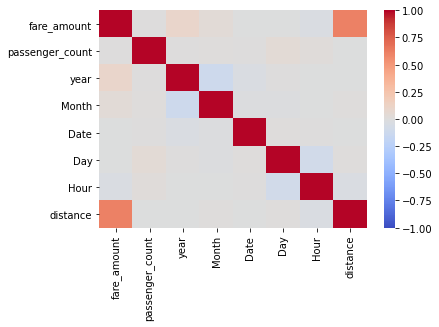

In [71]:
sns.heatmap(train.corr(), vmin=-1, vmax=1, cmap='coolwarm')

Features are not highly correlated with each other. And label "fare_amount" is highly correlated with distance feature.

### Data Visualization 

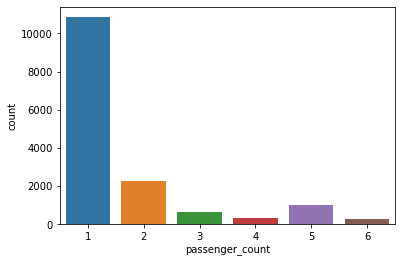

In [72]:
# Count plot on passenger count
sns.countplot(x="passenger_count", data=train)

We can observe that there are lot of single passengers, followed by 2,5,3,4 and 6

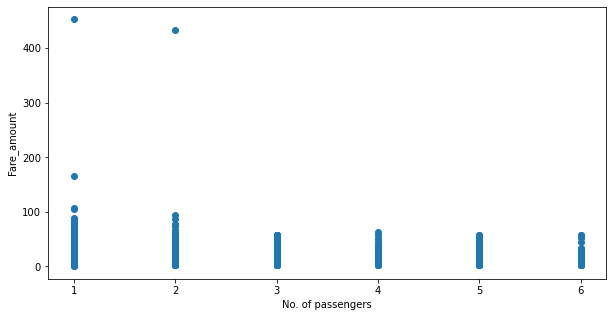

In [73]:
# relationship between passenger count and fare amount.
plt.figure(figsize=(10,5))
plt.scatter(x="passenger_count",y="fare_amount", data=train)
plt.xlabel('No. of passengers')
plt.ylabel('Fare_amount')
plt.show()

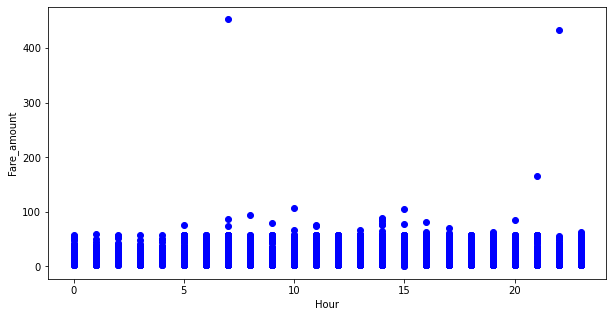

In [74]:

# realationship between fare and hour
plt.figure(figsize=(10,5))
plt.scatter(x="Hour",y="fare_amount", data=train,color='blue')
plt.xlabel('Hour')
plt.ylabel('Fare_amount')
plt.show()

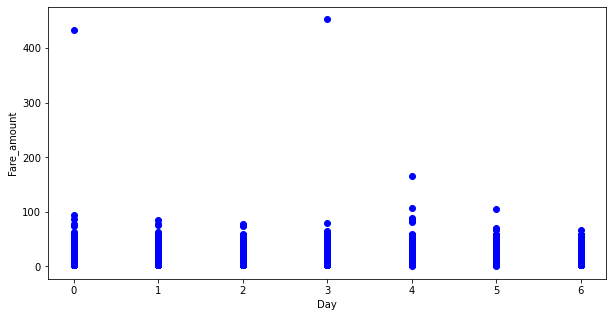

In [75]:
# realationship between fare and day
plt.figure(figsize=(10,5))
plt.scatter(x="Day",y="fare_amount", data=train,color='blue')
plt.xlabel('Day')
plt.ylabel('Fare_amount')
plt.show()

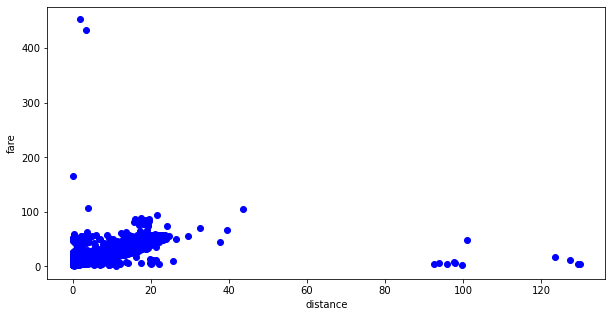

In [76]:
# realationship between fare and distance
plt.figure(figsize=(10,5))
plt.scatter(x="distance",y="fare_amount", data=train,color='blue')
plt.xlabel('distance')
plt.ylabel('fare')
plt.show()

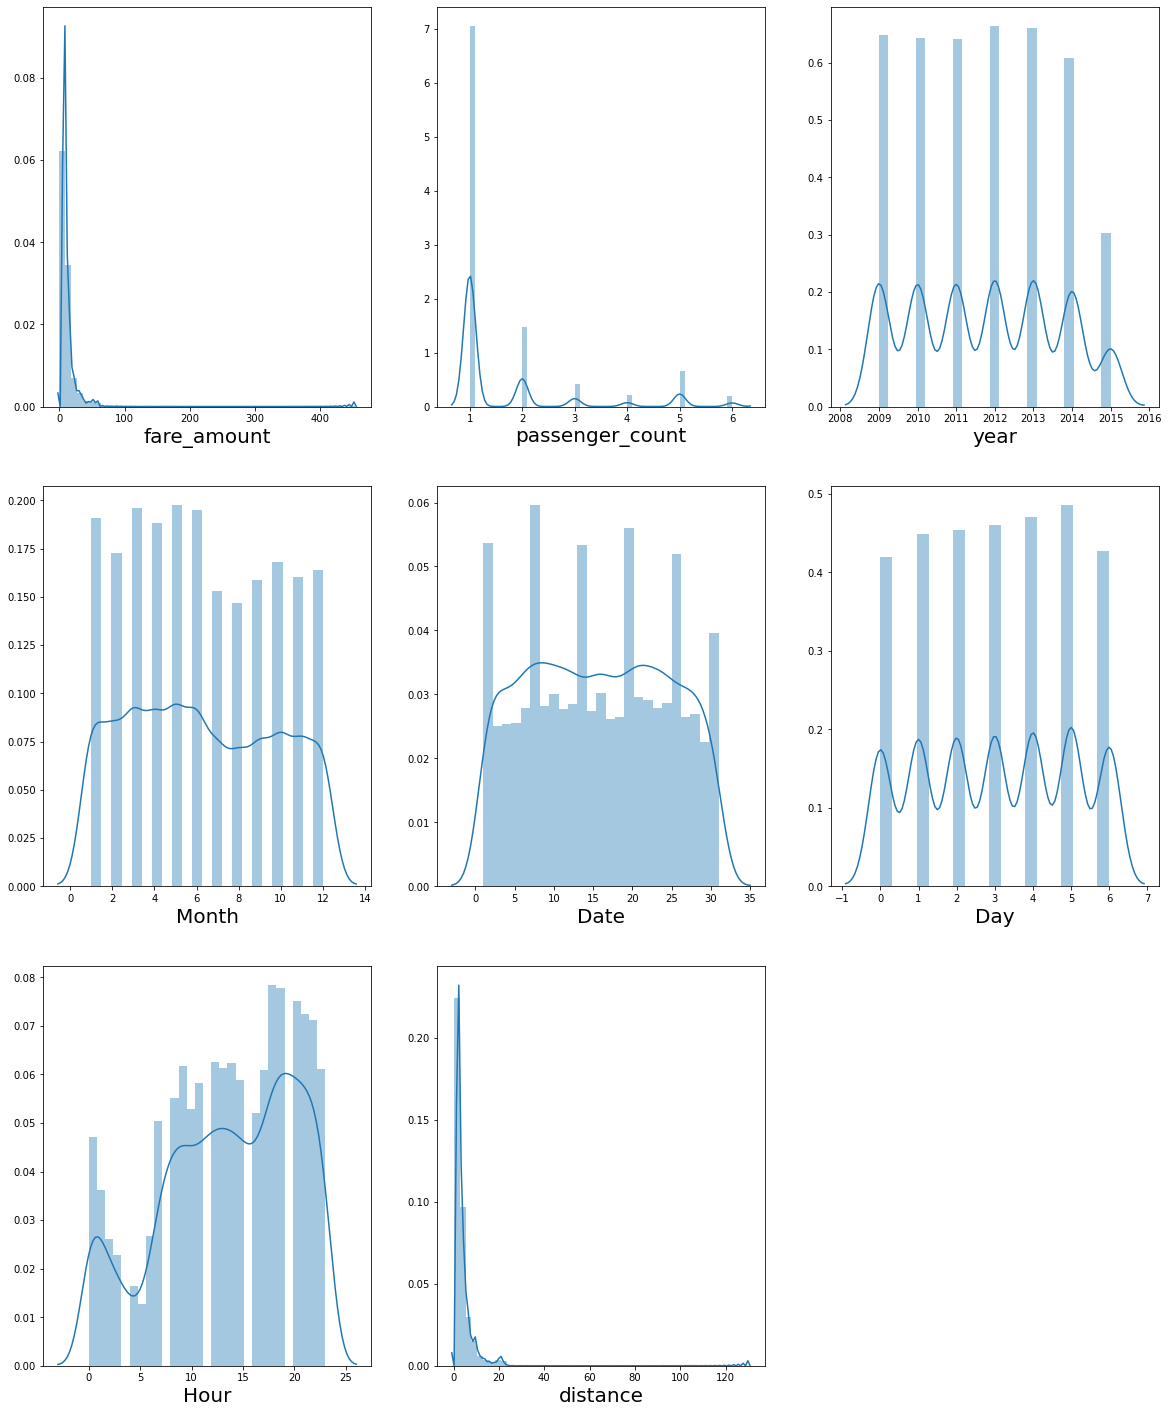

In [77]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

fare_amount and distance are not normally distributed.

In [78]:

#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


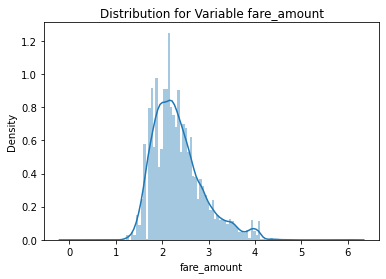

distance


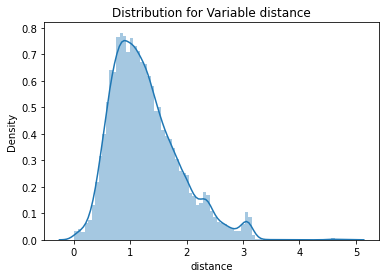

In [79]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

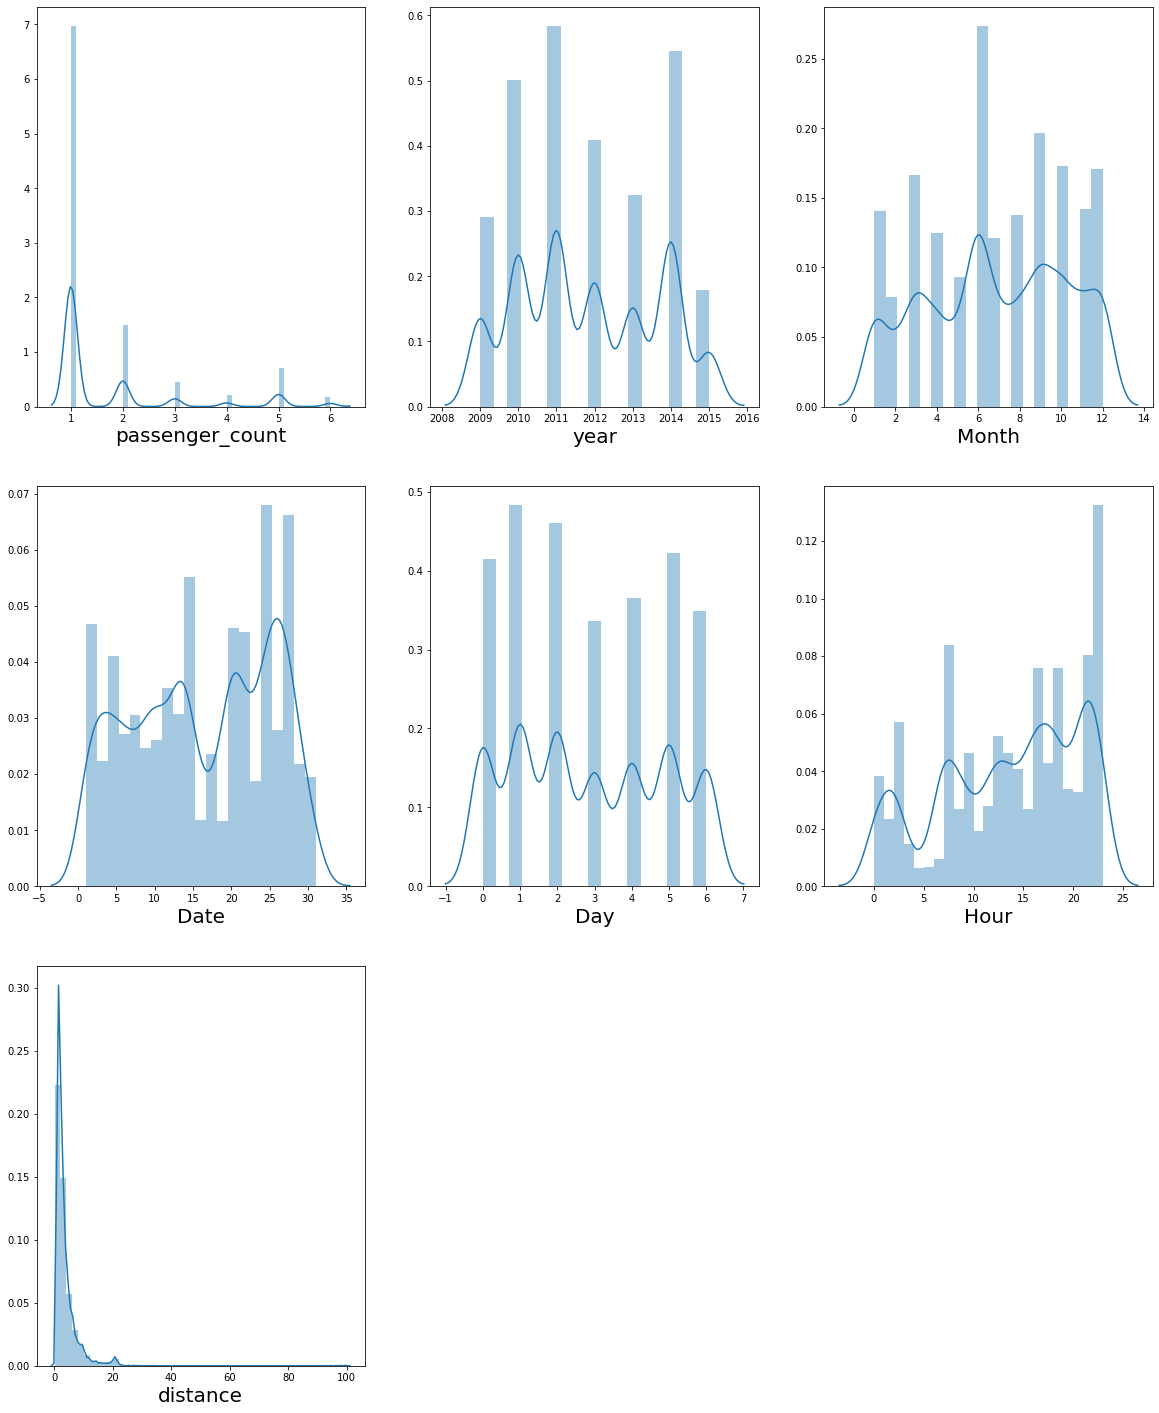

In [80]:
# let's see how data is distributed for every column of testdata
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in test:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(test[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

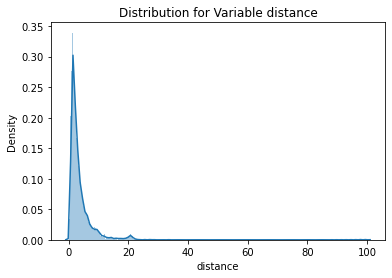

In [81]:
#rechecking the distribution for distance 
sns.distplot(test['distance'],bins='auto')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [82]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

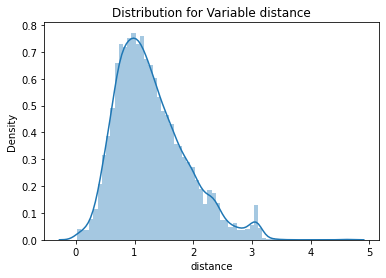

In [83]:
#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [84]:
#splitting features and lables
y=train['fare_amount'] 
x=train.drop(["fare_amount"],axis=1)

In [85]:
#splitting train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2)

### Linear Regression

In [86]:
lr= LinearRegression()

In [87]:
lr.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred_LR= lr.predict(x_test)

In [89]:
r2_score(y_test, y_pred_LR)

0.7943085750383834

In [90]:
##calculating RMSE for train data
RMSE_LR= np.sqrt(mean_squared_error(y_test, y_pred_LR))

In [91]:
print("Root Mean Squared Error For Testing data = "+str(RMSE_LR))

Root Mean Squared Error For Testing data = 0.24272749872139385


### Decision Tree


In [92]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [93]:
#prediction on test data
y_pred_DT = fit_DT.predict(x_test)

In [94]:
##calculating RMSE for test data
RMSE_DT = np.sqrt(mean_squared_error(y_test, y_pred_DT))

In [95]:
print("Root Mean Squared Error For Test data = "+str(RMSE_DT))

Root Mean Squared Error For Test data = 0.28025493351242536


In [96]:
## R^2 calculation for test data
r2_score(y_test, y_pred_DT)

0.7257890718782061

### Random Forest

In [97]:
rf = RandomForestRegressor(n_estimators=10)

In [98]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [99]:
y_pred_RF= rf.predict(x_test)

In [100]:
##calculating RMSE for test data
RMSE_RF = np.sqrt(mean_squared_error(y_test, y_pred_RF))

In [101]:
print("Root Mean Squared Error For Test data = "+str(RMSE_RF))

Root Mean Squared Error For Test data = 0.24998420473121494


In [102]:
r2_score(y_test, y_pred_RF)

0.7818258146860362

### GridSearchCV for Random Forest Model

In [103]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(x_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.81.
RMSE =  0.2312184435662826


### Random forest Model with hyper paramter tuning for predicting on test data 

In [104]:
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(x_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(test)

In [105]:
predictions_GRF_test_Df

array([2.36562233, 2.42729876, 1.69737721, ..., 3.91425389, 2.99610487,
       2.02082949])

In [106]:
test['predicted_fare_amount'] = predictions_GRF_test_Df

In [107]:
#write output to csv

test.to_csv("PredictedFare.csv", index = False)